<a href="https://colab.research.google.com/github/RapaDewan/Review_Scraping/blob/main/Review_scraping_and_analysis/Review_scraping_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Libraries**

In [1]:
!pip install google-play-scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [2]:
!pip install app_store_scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled req

## **Import Dependencies**

In [3]:
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid

## **Google Play Store reviews**

In [4]:
app_lists = ['com.twgbd.dims', 'com.medexplus.digitalitsheba.app', 'com.bizit.doctor.appointment', 'com.simpleappsvault.temperaturethermometerdiary', 'com.msd.professional', 'com.bondhu.daktar.daktarbondhu', 'com.arbondhu', 'com.media365ltd.doctime', 'com.msd.consumer', 'com.makio.medica', 'com.nhcps.medicode', 'com.healthtipsbd.medicineapp', 'da.bd.drug.directory', 'com.classnotebd.docterapp','com.blood.sugar.tracker.glucometer.Diary.test.diabetes.checker.info.glucose.convert.logger.health.fitness.monitor.history', 'com.classnotesbd.kobiraji_chikitsa_book', 'xray.body.scanne.ronasoftstudiosr.simulator.filter.camera', 'com.ronasoftstudios.earmaxfxpro', 'com.osudpotro', 'com.codersbucket.surokkha_app', 'com.itmedicus.dimsvet', 'in.naskar.achal.homoeopathy', 'com.bissoy.callomy3DViewer3', '', 'com.drugscom.app', 'com.AnatomyLearning.Anatomy3DViewer3', 'org.narayanahealth.nhcare', 'com.Medical.Know.Pregnant.Mother', 'net.medshr.android', 'com.classnotebd.imagetotextword',
'com.classnotesbd.homeopathy_guide_book', 'com.mobisystems.msdict.embedded.wireless.oxford.concisemedical', 'com.healtho_max.app.production', 'com.catfishanimationstudio.MuscularSystemLtreatment', 'comite', 'sqh.jotno.patient', 'com.rtrg.xraywow', 'com.sevenonelab.harbal_medicine_treatment', 'com.catfishanimationstudio.SkeletalSystemPreview', 'me.sinacare.app.android', 'com.pulsetechCalendar', 'com.ltd.medicart', 'com.sevenonelab.bangla_medicine_info', 'com.snonapps.aidoctor', 'com.lbrc.PeriodCalendar', 'com.EAGINsoftware.dejaloYa', 'io.healthos.androidecom', 'com.digitalbithub.shen', 'com.farmer.disease.animal.farm']

In [5]:
# Create an empty DataFrame to store all reviews
all_reviews_df = pd.DataFrame()


In [6]:
# Loop through the list of app package names and scrape reviews for each
%%time
for app in app_lists:
    try:
        # Scrape reviews for the current app
        reviews = reviews_all(
            app,
            sleep_milliseconds=0,
            lang='en',
            sort=Sort.NEWEST
        )

        # Convert the reviews to a DataFrame
        reviews_df = pd.DataFrame(np.array(reviews), columns=['review'])
        reviews_df = reviews_df.join(pd.DataFrame(reviews_df.pop('review').tolist()))

        # Drop unnecessary columns
        reviews_df.drop(columns=['userImage', 'reviewCreatedVersion'], inplace=True)

        # Rename columns to desired format
        reviews_df.rename(columns={
            'score': 'rating',
            'userName': 'user_name',
            'reviewId': 'review_id',
            'content': 'review_description',
            'at': 'review_date',
            'replyContent': 'developer_response',
            'repliedAt': 'developer_response_date',
            'thumbsUpCount': 'thumbs_up'
        }, inplace=True)

        # Insert additional columns
        reviews_df.insert(loc=0, column='source', value='Google Play')
        reviews_df.insert(loc=3, column='review_title', value=None)
        reviews_df['language_code'] = 'en'
        reviews_df['country_code'] = 'us'

        # Add a column for the app package name
        reviews_df['app_name'] = app

        # Append the current app's reviews to the full DataFrame
        all_reviews_df = pd.concat([all_reviews_df, reviews_df], ignore_index=True)

        print(f"Successfully scraped reviews for {app}")

    except Exception as e:
        print(f"Failed to scrape reviews for {app}: {e}")



Successfully scraped reviews for com.twgbd.dims


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.medexplus.digitalitsheba.app


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.bizit.doctor.appointment


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.simpleappsvault.temperaturethermometerdiary
Successfully scraped reviews for com.msd.professional
Successfully scraped reviews for com.bondhu.daktar.daktarbondhu
Failed to scrape reviews for com.arbondhu: "['userImage', 'reviewCreatedVersion'] not found in axis"
Successfully scraped reviews for com.media365ltd.doctime
Successfully scraped reviews for com.msd.consumer
Successfully scraped reviews for com.makio.medica


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.nhcps.medicode
Successfully scraped reviews for com.healthtipsbd.medicineapp
Successfully scraped reviews for da.bd.drug.directory
Successfully scraped reviews for com.classnotebd.docterapp
Successfully scraped reviews for com.blood.sugar.tracker.glucometer.Diary.test.diabetes.checker.info.glucose.convert.logger.health.fitness.monitor.history
Successfully scraped reviews for com.classnotesbd.kobiraji_chikitsa_book


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Failed to scrape reviews for xray.body.scanne.ronasoftstudiosr.simulator.filter.camera: "['userImage', 'reviewCreatedVersion'] not found in axis"
Successfully scraped reviews for com.ronasoftstudios.earmaxfxpro
Successfully scraped reviews for com.osudpotro


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.codersbucket.surokkha_app
Successfully scraped reviews for com.itmedicus.dimsvet


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for in.naskar.achal.homoeopathy
Failed to scrape reviews for com.bissoy.callomy3DViewer3: "['userImage', 'reviewCreatedVersion'] not found in axis"
Failed to scrape reviews for : "['userImage', 'reviewCreatedVersion'] not found in axis"
Successfully scraped reviews for com.drugscom.app
Successfully scraped reviews for com.AnatomyLearning.Anatomy3DViewer3
Successfully scraped reviews for org.narayanahealth.nhcare
Successfully scraped reviews for com.Medical.Know.Pregnant.Mother
Successfully scraped reviews for net.medshr.android
Successfully scraped reviews for com.classnotebd.imagetotextword


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.classnotesbd.homeopathy_guide_book
Successfully scraped reviews for com.mobisystems.msdict.embedded.wireless.oxford.concisemedical


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.healtho_max.app.production
Failed to scrape reviews for com.catfishanimationstudio.MuscularSystemLtreatment: "['userImage', 'reviewCreatedVersion'] not found in axis"
Failed to scrape reviews for comite: "['userImage', 'reviewCreatedVersion'] not found in axis"
Successfully scraped reviews for sqh.jotno.patient


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.rtrg.xraywow


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.sevenonelab.harbal_medicine_treatment
Successfully scraped reviews for com.catfishanimationstudio.SkeletalSystemPreview


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for me.sinacare.app.android
Failed to scrape reviews for com.pulsetechCalendar: "['userImage', 'reviewCreatedVersion'] not found in axis"
Failed to scrape reviews for com.ltd.medicart: "['userImage', 'reviewCreatedVersion'] not found in axis"


<timed exec>:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Successfully scraped reviews for com.sevenonelab.bangla_medicine_info
Successfully scraped reviews for com.snonapps.aidoctor
Successfully scraped reviews for com.lbrc.PeriodCalendar
Successfully scraped reviews for com.EAGINsoftware.dejaloYa
Successfully scraped reviews for io.healthos.androidecom
Successfully scraped reviews for com.digitalbithub.shen
Successfully scraped reviews for com.farmer.disease.animal.farm
CPU times: user 11.8 s, sys: 834 ms, total: 12.6 s
Wall time: 49 s


In [7]:
# Display the final DataFrame
all_reviews_df

# Save the DataFrame to a CSV file with an escape character to handle special characters
all_reviews_df.to_csv('all_app_reviews.csv', index=False, escapechar='\\')

## Loading and Inspecting Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset (our scraped reviews)
df = pd.read_csv('/content/all_app_reviews.csv')

# Inspect the first few rows
print(df.head())

# Basic summary statistics
print(df.describe())

# Checking for missing values
print(df.isnull().sum())


        source                             review_id      user_name  \
0  Google Play  67065b67-1f8a-4c4b-bb3b-91b724eba4c9  A Google user   
1  Google Play  e52d3451-aab5-4554-a598-faf1f1b09279  A Google user   
2  Google Play  bca4a779-df2a-4b7c-a768-de53da645d01  A Google user   
3  Google Play  511ea254-4cfa-4146-aa2e-3320a461d1ac  A Google user   
4  Google Play  a72f291c-f8ac-44e1-b95d-b98f1bfd2973  A Google user   

   review_title      review_description  rating  thumbs_up  \
0           NaN               Nice work       5          0   
1           NaN             that's good       1          0   
2           NaN  best apps for medicine       5          0   
3           NaN                    nice       5          0   
4           NaN               Good Apps       4          0   

           review_date developer_response developer_response_date appVersion  \
0  2024-09-27 18:53:48                NaN                     NaN      2.1.6   
1  2024-09-27 18:19:44                Na

## Analyzing Rating Distribution

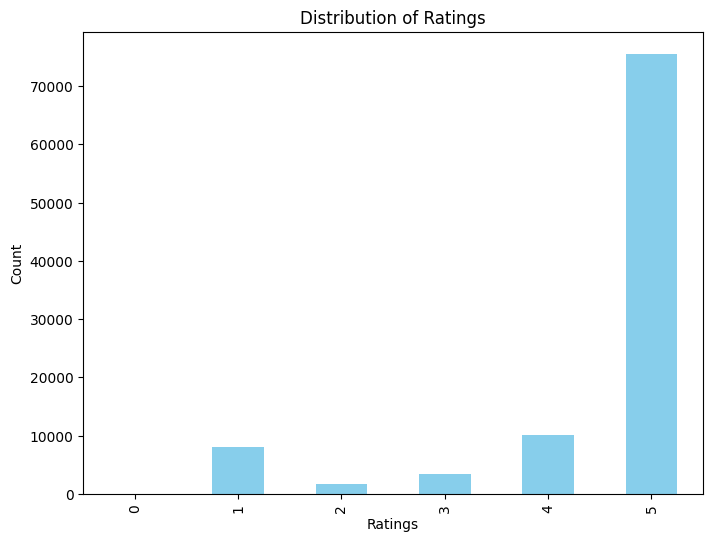

In [9]:
# Plotting the distribution of ratings
plt.figure(figsize=(8, 6))
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


##Analyzing Review Length

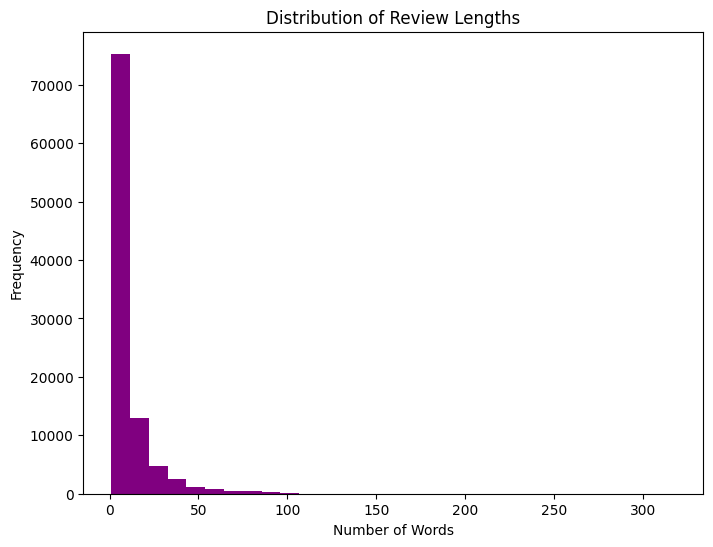

In [10]:
# Calculate review length
df['review_length'] = df['review_description'].apply(lambda x: len(str(x).split()))

# Plot review length distribution
plt.figure(figsize=(8, 6))
df['review_length'].plot(kind='hist', bins=30, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


##Sentiment and Rating Correlation

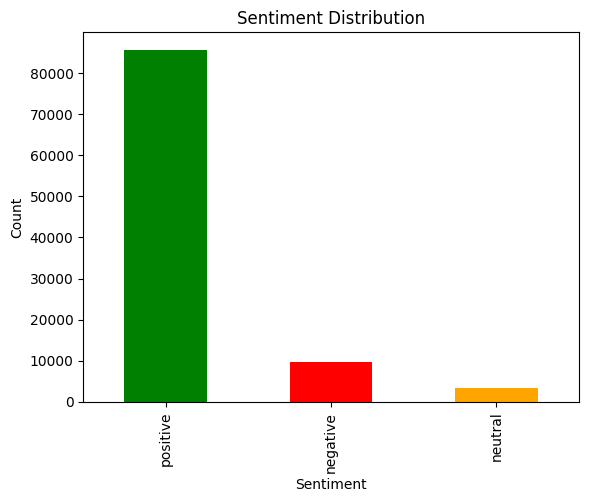

In [12]:
# Mapping ratings to sentiment (positive if 4-5, negative if 1-2, neutral if 3)
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Plot the sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


##Correlation Between Variables

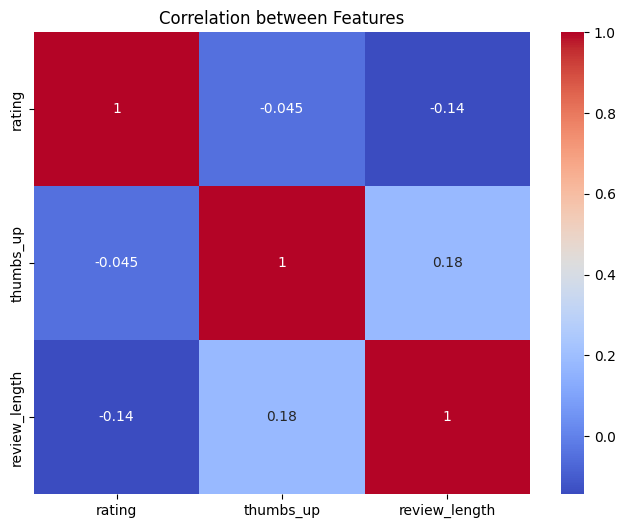

In [13]:
# Correlation heatmap
import seaborn as sns

# Compute correlations (works if you have numerical columns)
correlation_matrix = df[['rating', 'thumbs_up', 'review_length']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()


##Visualizing Trends Over Time

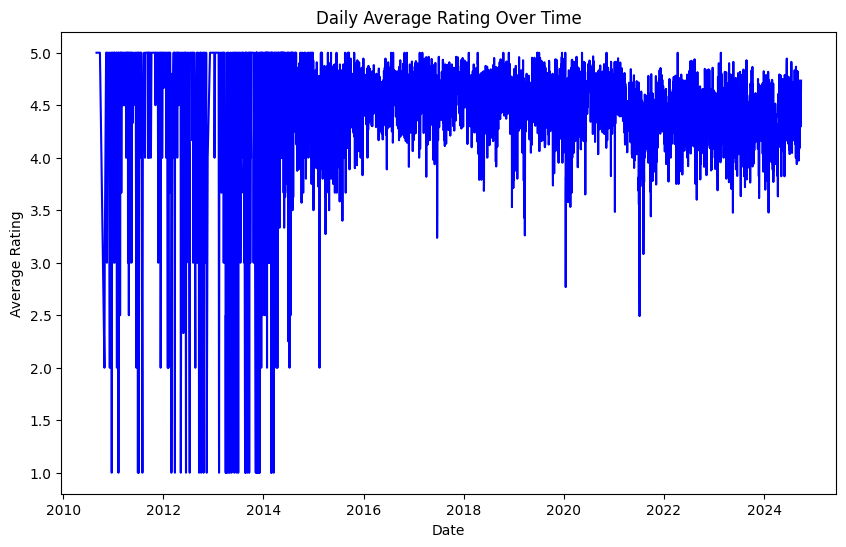

In [14]:
# Convert review_date to datetime
df['review_date'] = pd.to_datetime(df['review_date'])

# Group by date and calculate average rating
daily_avg_rating = df.groupby(df['review_date'].dt.date)['rating'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
daily_avg_rating.plot(kind='line', color='blue')
plt.title('Daily Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()


##Analysis of Developer Responses


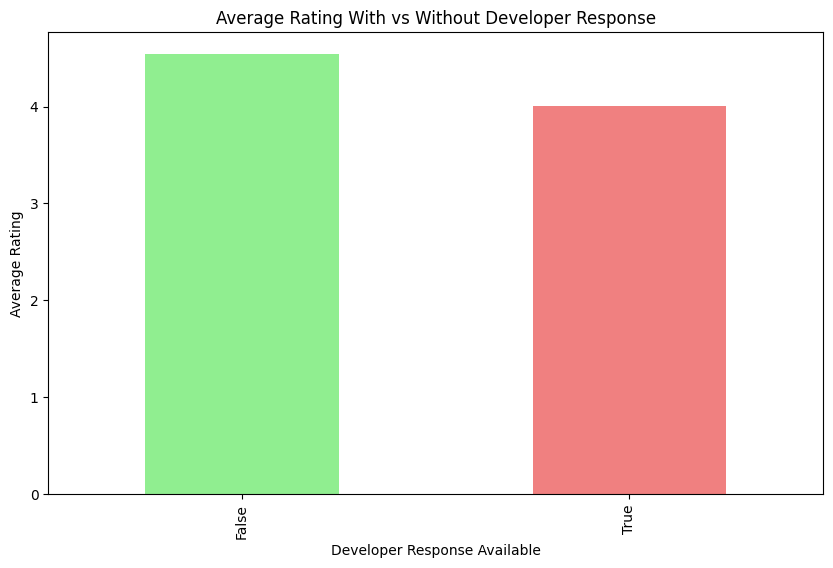

In [15]:
# Checking if the developer responded
df['developer_response_available'] = df['developer_response'].notnull()

# Plot rating distribution with and without developer responses
plt.figure(figsize=(10, 6))
df.groupby('developer_response_available')['rating'].mean().plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Average Rating With vs Without Developer Response')
plt.xlabel('Developer Response Available')
plt.ylabel('Average Rating')
plt.show()


## Analyzing Thumbs-Up Count

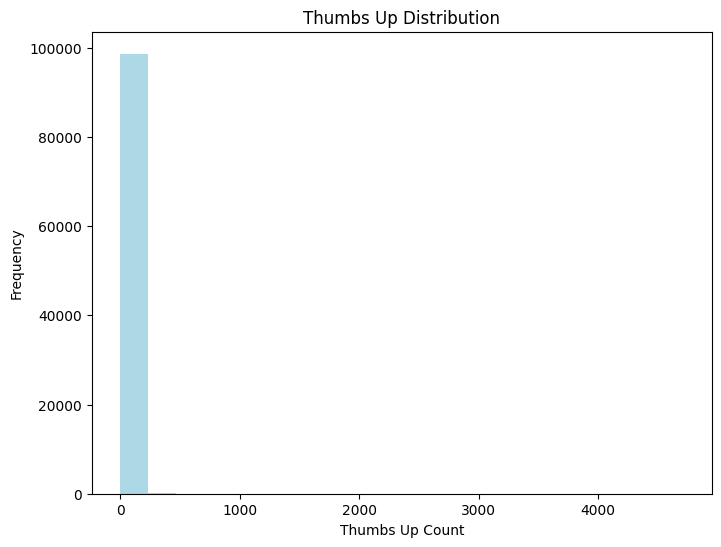

In [16]:
# Plotting thumbs up distribution
plt.figure(figsize=(8, 6))
df['thumbs_up'].plot(kind='hist', bins=20, color='lightblue')
plt.title('Thumbs Up Distribution')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()


##Feature Engineering for ML

In [17]:
# Example: Adding review length and sentiment to the dataset for ML
df['review_length'] = df['review_description'].apply(lambda x: len(str(x).split()))
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)  # binary sentiment: positive (1) or negative (0)
